In [20]:
import torch
import torch.nn.functional as F
import torchvision


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

In [2]:
if torch.cuda.is_available():
    device = "cuda:0"
    print(f"Using {torch.cuda.get_device_name()}")
else:
    device = "cpu"
    print("Using CPU")

Using NVIDIA GeForce RTX 3080


In [5]:
if not os.path.exists("dataset"):
    os.mkdir("dataset")

In [11]:
train_data = torchvision.datasets.MNIST(root="dataset/", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root="dataset/", train=False, transform=torchvision.transforms.ToTensor(), download=True)

In [60]:
train_dl = torch.utils.data.DataLoader(train_data,
                                      batch_size=16,
                                      shuffle=True)
test_dl = torch.utils.data.DataLoader(test_data,
                                     batch_size=64,
                                     shuffle=False)

In [16]:
features, labels = next(iter(train_dl))

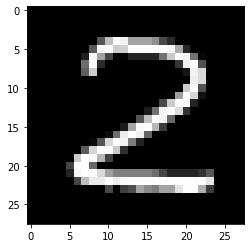

2


In [38]:
n = 12

img = features[n]
img.shape

plt.imshow(img.view(28,28), cmap="gray")
plt.show()
print(labels[n].item())

### Model

In [72]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(28*28, 320)
        self.linear2 = torch.nn.Linear(320, 640)
        self.linear3 = torch.nn.Linear(640, 10)
        
    def forward(self, X):
        X = X.view(-1, 28*28)
        X = self.linear1(X)
        X = F.relu(X)
        X = self.linear2(X)
        X = F.relu(X)
        X = self.linear3(X)
        return F.softmax(X)

In [73]:
model = Model().to("cpu")

In [74]:
model

Model(
  (linear1): Linear(in_features=784, out_features=320, bias=True)
  (linear2): Linear(in_features=320, out_features=640, bias=True)
  (linear3): Linear(in_features=640, out_features=10, bias=True)
)

In [75]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_dl):
        preds = model(data)
        
        optimizer.zero_grad()
        
        loss = criterion(preds, target)
        loss.backward()
        optimizer.step()
        
        print(f"Epoch: {epoch+1} Loss; {loss.item()}")

<ipython-input-72-d24e5d0562d3>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(X)


Epoch: 1 Loss; 2.297468423843384
Epoch: 1 Loss; 2.3025991916656494
Epoch: 1 Loss; 2.297459840774536
Epoch: 1 Loss; 2.290743350982666
Epoch: 1 Loss; 2.2866032123565674
Epoch: 1 Loss; 2.26269793510437
Epoch: 1 Loss; 2.282641649246216
Epoch: 1 Loss; 2.283841133117676
Epoch: 1 Loss; 2.274892568588257
Epoch: 1 Loss; 2.2567336559295654
Epoch: 1 Loss; 2.2124435901641846
Epoch: 1 Loss; 2.215975522994995
Epoch: 1 Loss; 2.1718034744262695
Epoch: 1 Loss; 2.1141812801361084
Epoch: 1 Loss; 2.026834726333618
Epoch: 1 Loss; 2.1734602451324463
Epoch: 1 Loss; 2.06650710105896
Epoch: 1 Loss; 2.0746359825134277
Epoch: 1 Loss; 2.15187406539917
Epoch: 1 Loss; 1.9666643142700195
Epoch: 1 Loss; 2.2023351192474365
Epoch: 1 Loss; 2.1142578125
Epoch: 1 Loss; 2.033578395843506
Epoch: 1 Loss; 1.8583217859268188
Epoch: 1 Loss; 2.0025405883789062
Epoch: 1 Loss; 1.8916380405426025
Epoch: 1 Loss; 1.973633050918579
Epoch: 1 Loss; 1.862750768661499
Epoch: 1 Loss; 2.135085105895996
Epoch: 1 Loss; 1.8938963413238525
Epoc

Epoch: 1 Loss; 1.7963895797729492
Epoch: 1 Loss; 1.569267988204956
Epoch: 1 Loss; 1.604736328125
Epoch: 1 Loss; 1.7825124263763428
Epoch: 1 Loss; 1.6633764505386353
Epoch: 1 Loss; 1.502041220664978
Epoch: 1 Loss; 1.5367258787155151
Epoch: 1 Loss; 1.7255183458328247
Epoch: 1 Loss; 1.7241297960281372
Epoch: 1 Loss; 1.5600005388259888
Epoch: 1 Loss; 1.6920571327209473
Epoch: 1 Loss; 1.470691204071045
Epoch: 1 Loss; 1.5786150693893433
Epoch: 1 Loss; 1.5337848663330078
Epoch: 1 Loss; 1.5262701511383057
Epoch: 1 Loss; 1.7010250091552734
Epoch: 1 Loss; 1.6058001518249512
Epoch: 1 Loss; 1.5347018241882324
Epoch: 1 Loss; 1.6056164503097534
Epoch: 1 Loss; 1.627246618270874
Epoch: 1 Loss; 1.7101142406463623
Epoch: 1 Loss; 1.6441757678985596
Epoch: 1 Loss; 1.678755283355713
Epoch: 1 Loss; 1.5372250080108643
Epoch: 1 Loss; 1.4625468254089355
Epoch: 1 Loss; 1.607781171798706
Epoch: 1 Loss; 1.5894736051559448
Epoch: 1 Loss; 1.5962612628936768
Epoch: 1 Loss; 1.5695265531539917
Epoch: 1 Loss; 1.4702959

Epoch: 1 Loss; 1.6689924001693726
Epoch: 1 Loss; 1.5331437587738037
Epoch: 1 Loss; 1.4864262342453003
Epoch: 1 Loss; 1.6303260326385498
Epoch: 1 Loss; 1.680272102355957
Epoch: 1 Loss; 1.5923540592193604
Epoch: 1 Loss; 1.5496306419372559
Epoch: 1 Loss; 1.548034429550171
Epoch: 1 Loss; 1.6486897468566895
Epoch: 1 Loss; 1.591001033782959
Epoch: 1 Loss; 1.657117486000061
Epoch: 1 Loss; 1.4615471363067627
Epoch: 1 Loss; 1.520678997039795
Epoch: 1 Loss; 1.4650795459747314
Epoch: 1 Loss; 1.5951024293899536
Epoch: 1 Loss; 1.4752683639526367
Epoch: 1 Loss; 1.6274986267089844
Epoch: 1 Loss; 1.5320155620574951
Epoch: 1 Loss; 1.581031322479248
Epoch: 1 Loss; 1.4629063606262207
Epoch: 1 Loss; 1.5091829299926758
Epoch: 1 Loss; 1.5348124504089355
Epoch: 1 Loss; 1.5810019969940186
Epoch: 1 Loss; 1.5991982221603394
Epoch: 1 Loss; 1.4655137062072754
Epoch: 1 Loss; 1.604076862335205
Epoch: 1 Loss; 1.5357166528701782
Epoch: 1 Loss; 1.5680930614471436
Epoch: 1 Loss; 1.522804617881775
Epoch: 1 Loss; 1.53314

Epoch: 1 Loss; 1.5238361358642578
Epoch: 1 Loss; 1.5157667398452759
Epoch: 1 Loss; 1.5235251188278198
Epoch: 1 Loss; 1.5728203058242798
Epoch: 1 Loss; 1.4620107412338257
Epoch: 1 Loss; 1.481706976890564
Epoch: 1 Loss; 1.5247762203216553
Epoch: 1 Loss; 1.5866851806640625
Epoch: 1 Loss; 1.593552827835083
Epoch: 1 Loss; 1.5240416526794434
Epoch: 1 Loss; 1.4644362926483154
Epoch: 1 Loss; 1.521744966506958
Epoch: 1 Loss; 1.5753121376037598
Epoch: 1 Loss; 1.6638848781585693
Epoch: 1 Loss; 1.6847227811813354
Epoch: 1 Loss; 1.709625005722046
Epoch: 1 Loss; 1.5028963088989258
Epoch: 1 Loss; 1.5919474363327026
Epoch: 1 Loss; 1.462041974067688
Epoch: 1 Loss; 1.540975570678711
Epoch: 1 Loss; 1.5248091220855713
Epoch: 1 Loss; 1.5885913372039795
Epoch: 1 Loss; 1.5805307626724243
Epoch: 1 Loss; 1.5062888860702515
Epoch: 1 Loss; 1.4624513387680054
Epoch: 1 Loss; 1.5992542505264282
Epoch: 1 Loss; 1.6616370677947998
Epoch: 1 Loss; 1.5879803895950317
Epoch: 1 Loss; 1.5251401662826538
Epoch: 1 Loss; 1.588

Epoch: 1 Loss; 1.6934359073638916
Epoch: 1 Loss; 1.5354520082473755
Epoch: 1 Loss; 1.4622175693511963
Epoch: 1 Loss; 1.461168646812439
Epoch: 1 Loss; 1.584469199180603
Epoch: 1 Loss; 1.51790189743042
Epoch: 1 Loss; 1.5036736726760864
Epoch: 1 Loss; 1.4616713523864746
Epoch: 1 Loss; 1.5288405418395996
Epoch: 1 Loss; 1.646458625793457
Epoch: 1 Loss; 1.4785614013671875
Epoch: 1 Loss; 1.582348108291626
Epoch: 1 Loss; 1.5201832056045532
Epoch: 1 Loss; 1.4814717769622803
Epoch: 1 Loss; 1.5033018589019775
Epoch: 1 Loss; 1.5967600345611572
Epoch: 1 Loss; 1.4631922245025635
Epoch: 1 Loss; 1.5504471063613892
Epoch: 1 Loss; 1.5893089771270752
Epoch: 1 Loss; 1.5239636898040771
Epoch: 1 Loss; 1.5243499279022217
Epoch: 1 Loss; 1.7150999307632446
Epoch: 1 Loss; 1.4612300395965576
Epoch: 1 Loss; 1.5239934921264648
Epoch: 1 Loss; 1.6473596096038818
Epoch: 1 Loss; 1.59473717212677
Epoch: 1 Loss; 1.4801359176635742
Epoch: 1 Loss; 1.501251459121704
Epoch: 1 Loss; 1.5792336463928223
Epoch: 1 Loss; 1.599080

Epoch: 1 Loss; 1.6850526332855225
Epoch: 1 Loss; 1.4646542072296143
Epoch: 1 Loss; 1.4679745435714722
Epoch: 1 Loss; 1.4707590341567993
Epoch: 1 Loss; 1.5946130752563477
Epoch: 1 Loss; 1.4617068767547607
Epoch: 1 Loss; 1.4799301624298096
Epoch: 1 Loss; 1.5431934595108032
Epoch: 1 Loss; 1.5732303857803345
Epoch: 1 Loss; 1.5250766277313232
Epoch: 1 Loss; 1.5336768627166748
Epoch: 1 Loss; 1.5005781650543213
Epoch: 1 Loss; 1.4613122940063477
Epoch: 1 Loss; 1.6094001531600952
Epoch: 1 Loss; 1.5872538089752197
Epoch: 1 Loss; 1.5233073234558105
Epoch: 1 Loss; 1.56156325340271
Epoch: 1 Loss; 1.600726842880249
Epoch: 1 Loss; 1.461349606513977
Epoch: 1 Loss; 1.4646176099777222
Epoch: 1 Loss; 1.522342324256897
Epoch: 1 Loss; 1.5209720134735107
Epoch: 1 Loss; 1.5219205617904663
Epoch: 1 Loss; 1.5781036615371704
Epoch: 1 Loss; 1.530218482017517
Epoch: 1 Loss; 1.5275952816009521
Epoch: 1 Loss; 1.555808186531067
Epoch: 1 Loss; 1.4623782634735107
Epoch: 1 Loss; 1.4738523960113525
Epoch: 1 Loss; 1.5859

Epoch: 1 Loss; 1.5236409902572632
Epoch: 1 Loss; 1.5488508939743042
Epoch: 1 Loss; 1.4986212253570557
Epoch: 1 Loss; 1.4646742343902588
Epoch: 1 Loss; 1.5729045867919922
Epoch: 1 Loss; 1.4869678020477295
Epoch: 1 Loss; 1.5236353874206543
Epoch: 1 Loss; 1.522387981414795
Epoch: 1 Loss; 1.523651123046875
Epoch: 1 Loss; 1.5737354755401611
Epoch: 1 Loss; 1.5208587646484375
Epoch: 1 Loss; 1.4629080295562744
Epoch: 1 Loss; 1.5236732959747314
Epoch: 1 Loss; 1.4757280349731445
Epoch: 1 Loss; 1.5224268436431885
Epoch: 1 Loss; 1.4652656316757202
Epoch: 1 Loss; 1.461160659790039
Epoch: 1 Loss; 1.5272941589355469
Epoch: 1 Loss; 1.6058070659637451
Epoch: 1 Loss; 1.468083381652832
Epoch: 1 Loss; 1.461173176765442
Epoch: 1 Loss; 1.4613499641418457
Epoch: 1 Loss; 1.6314133405685425
Epoch: 1 Loss; 1.5329605340957642
Epoch: 1 Loss; 1.523612380027771
Epoch: 1 Loss; 1.6438302993774414
Epoch: 1 Loss; 1.523919701576233
Epoch: 1 Loss; 1.5077661275863647
Epoch: 1 Loss; 1.565126895904541
Epoch: 1 Loss; 1.46145

Epoch: 1 Loss; 1.523229956626892
Epoch: 1 Loss; 1.4620435237884521
Epoch: 1 Loss; 1.4733864068984985
Epoch: 1 Loss; 1.7435380220413208
Epoch: 1 Loss; 1.5236504077911377
Epoch: 1 Loss; 1.5163031816482544
Epoch: 1 Loss; 1.5814242362976074
Epoch: 1 Loss; 1.5236469507217407
Epoch: 1 Loss; 1.4613308906555176
Epoch: 1 Loss; 1.5028574466705322
Epoch: 1 Loss; 1.4662013053894043
Epoch: 1 Loss; 1.5236592292785645
Epoch: 1 Loss; 1.5841121673583984
Epoch: 1 Loss; 1.4613615274429321
Epoch: 1 Loss; 1.5238767862319946
Epoch: 1 Loss; 1.581043004989624
Epoch: 1 Loss; 1.462020993232727
Epoch: 1 Loss; 1.5246338844299316
Epoch: 1 Loss; 1.6331839561462402
Epoch: 1 Loss; 1.614687442779541
Epoch: 1 Loss; 1.5243146419525146
Epoch: 1 Loss; 1.5084116458892822
Epoch: 1 Loss; 1.5236501693725586
Epoch: 1 Loss; 1.4642744064331055
Epoch: 1 Loss; 1.4611502885818481
Epoch: 1 Loss; 1.5304001569747925
Epoch: 1 Loss; 1.516083002090454
Epoch: 1 Loss; 1.5252091884613037
Epoch: 1 Loss; 1.515411615371704
Epoch: 1 Loss; 1.465

Epoch: 1 Loss; 1.4615473747253418
Epoch: 1 Loss; 1.5865352153778076
Epoch: 1 Loss; 1.5677239894866943
Epoch: 1 Loss; 1.5080416202545166
Epoch: 1 Loss; 1.6617600917816162
Epoch: 1 Loss; 1.52363920211792
Epoch: 1 Loss; 1.5303168296813965
Epoch: 1 Loss; 1.523655891418457
Epoch: 1 Loss; 1.573087215423584
Epoch: 1 Loss; 1.473315715789795
Epoch: 1 Loss; 1.4843521118164062
Epoch: 1 Loss; 1.523639440536499
Epoch: 1 Loss; 1.524935245513916
Epoch: 1 Loss; 1.5684977769851685
Epoch: 1 Loss; 1.5236451625823975
Epoch: 1 Loss; 1.5870124101638794
Epoch: 1 Loss; 1.6056396961212158
Epoch: 1 Loss; 1.5751979351043701
Epoch: 1 Loss; 1.5823482275009155
Epoch: 1 Loss; 1.6407372951507568
Epoch: 1 Loss; 1.5237213373184204
Epoch: 1 Loss; 1.4935863018035889
Epoch: 1 Loss; 1.540470838546753
Epoch: 1 Loss; 1.4611504077911377
Epoch: 1 Loss; 1.6506826877593994
Epoch: 1 Loss; 1.5921025276184082
Epoch: 1 Loss; 1.461932897567749
Epoch: 1 Loss; 1.4865539073944092
Epoch: 1 Loss; 1.582646369934082
Epoch: 1 Loss; 1.6486322

Epoch: 1 Loss; 1.4611504077911377
Epoch: 1 Loss; 1.524209976196289
Epoch: 1 Loss; 1.5237759351730347
Epoch: 1 Loss; 1.583956241607666
Epoch: 1 Loss; 1.4706287384033203
Epoch: 1 Loss; 1.5236178636550903
Epoch: 1 Loss; 1.5640506744384766
Epoch: 1 Loss; 1.6145546436309814
Epoch: 1 Loss; 1.4721909761428833
Epoch: 1 Loss; 1.648538589477539
Epoch: 1 Loss; 1.6426236629486084
Epoch: 1 Loss; 1.5229153633117676
Epoch: 1 Loss; 1.5384893417358398
Epoch: 1 Loss; 1.463078498840332
Epoch: 1 Loss; 1.580871820449829
Epoch: 1 Loss; 1.5905299186706543
Epoch: 1 Loss; 1.5850822925567627
Epoch: 1 Loss; 1.4632396697998047
Epoch: 1 Loss; 1.5851080417633057
Epoch: 1 Loss; 1.572251319885254
Epoch: 1 Loss; 1.5252470970153809
Epoch: 1 Loss; 1.545017957687378
Epoch: 1 Loss; 1.7086374759674072
Epoch: 1 Loss; 1.5236515998840332
Epoch: 1 Loss; 1.5211083889007568
Epoch: 1 Loss; 1.523653268814087
Epoch: 1 Loss; 1.5919363498687744
Epoch: 1 Loss; 1.5248677730560303
Epoch: 1 Loss; 1.4632627964019775
Epoch: 1 Loss; 1.46324

Epoch: 1 Loss; 1.5338417291641235
Epoch: 1 Loss; 1.523801326751709
Epoch: 1 Loss; 1.523775339126587
Epoch: 1 Loss; 1.461472749710083
Epoch: 1 Loss; 1.4611632823944092
Epoch: 1 Loss; 1.4692041873931885
Epoch: 1 Loss; 1.461151123046875
Epoch: 1 Loss; 1.461164951324463
Epoch: 1 Loss; 1.6349859237670898
Epoch: 1 Loss; 1.5237950086593628
Epoch: 1 Loss; 1.472999930381775
Epoch: 1 Loss; 1.5861129760742188
Epoch: 1 Loss; 1.462242603302002
Epoch: 1 Loss; 1.579257607460022
Epoch: 1 Loss; 1.4611502885818481
Epoch: 1 Loss; 1.5357024669647217
Epoch: 1 Loss; 1.5875790119171143
Epoch: 1 Loss; 1.4629472494125366
Epoch: 1 Loss; 1.5727322101593018
Epoch: 1 Loss; 1.4612352848052979
Epoch: 1 Loss; 1.5307061672210693
Epoch: 1 Loss; 1.5194292068481445
Epoch: 1 Loss; 1.5059149265289307
Epoch: 1 Loss; 1.5208419561386108
Epoch: 1 Loss; 1.5935819149017334
Epoch: 1 Loss; 1.468043327331543
Epoch: 1 Loss; 1.4637856483459473
Epoch: 1 Loss; 1.5236997604370117
Epoch: 1 Loss; 1.523750901222229
Epoch: 1 Loss; 1.5714933

Epoch: 1 Loss; 1.5186269283294678
Epoch: 1 Loss; 1.5357428789138794
Epoch: 1 Loss; 1.492424726486206
Epoch: 1 Loss; 1.4611581563949585
Epoch: 1 Loss; 1.5319132804870605
Epoch: 1 Loss; 1.5480027198791504
Epoch: 1 Loss; 1.5861554145812988
Epoch: 1 Loss; 1.4611648321151733
Epoch: 1 Loss; 1.5855473279953003
Epoch: 1 Loss; 1.5834178924560547
Epoch: 1 Loss; 1.5668354034423828
Epoch: 1 Loss; 1.5280728340148926
Epoch: 1 Loss; 1.6809086799621582
Epoch: 1 Loss; 1.461153268814087
Epoch: 1 Loss; 1.462631344795227
Epoch: 1 Loss; 1.4613852500915527
Epoch: 1 Loss; 1.6216331720352173
Epoch: 1 Loss; 1.5850059986114502
Epoch: 1 Loss; 1.5315439701080322
Epoch: 1 Loss; 1.6488397121429443
Epoch: 1 Loss; 1.5830636024475098
Epoch: 1 Loss; 1.523653507232666
Epoch: 1 Loss; 1.4612088203430176
Epoch: 1 Loss; 1.5835256576538086
Epoch: 1 Loss; 1.522977352142334
Epoch: 1 Loss; 1.6431012153625488
Epoch: 1 Loss; 1.5278339385986328
Epoch: 1 Loss; 1.52720046043396
Epoch: 1 Loss; 1.4625414609909058
Epoch: 1 Loss; 1.5482

Epoch: 1 Loss; 1.4611620903015137
Epoch: 1 Loss; 1.5233179330825806
Epoch: 1 Loss; 1.5865004062652588
Epoch: 1 Loss; 1.5861499309539795
Epoch: 1 Loss; 1.523301601409912
Epoch: 1 Loss; 1.646636724472046
Epoch: 1 Loss; 1.470304012298584
Epoch: 1 Loss; 1.485368251800537
Epoch: 1 Loss; 1.5853899717330933
Epoch: 1 Loss; 1.5234086513519287
Epoch: 1 Loss; 1.5537798404693604
Epoch: 1 Loss; 1.523576259613037
Epoch: 1 Loss; 1.4650225639343262
Epoch: 1 Loss; 1.640439748764038
Epoch: 1 Loss; 1.4611510038375854
Epoch: 1 Loss; 1.6209346055984497
Epoch: 1 Loss; 1.592118501663208
Epoch: 1 Loss; 1.526559591293335
Epoch: 1 Loss; 1.4611525535583496
Epoch: 1 Loss; 1.6481493711471558
Epoch: 1 Loss; 1.4611530303955078
Epoch: 1 Loss; 1.5844032764434814
Epoch: 1 Loss; 1.5222750902175903
Epoch: 1 Loss; 1.5341386795043945
Epoch: 1 Loss; 1.6499028205871582
Epoch: 1 Loss; 1.4930839538574219
Epoch: 1 Loss; 1.5266084671020508
Epoch: 1 Loss; 1.5236601829528809
Epoch: 1 Loss; 1.4635429382324219
Epoch: 1 Loss; 1.46115

Epoch: 1 Loss; 1.584043264389038
Epoch: 1 Loss; 1.5245766639709473
Epoch: 1 Loss; 1.4797719717025757
Epoch: 1 Loss; 1.5433051586151123
Epoch: 1 Loss; 1.4646309614181519
Epoch: 1 Loss; 1.5740700960159302
Epoch: 1 Loss; 1.5731310844421387
Epoch: 1 Loss; 1.5418002605438232
Epoch: 1 Loss; 1.5237843990325928
Epoch: 1 Loss; 1.5236504077911377
Epoch: 1 Loss; 1.5872368812561035
Epoch: 1 Loss; 1.4611506462097168
Epoch: 1 Loss; 1.4621988534927368
Epoch: 1 Loss; 1.4612432718276978
Epoch: 1 Loss; 1.6291730403900146
Epoch: 1 Loss; 1.5204168558120728
Epoch: 1 Loss; 1.4679388999938965
Epoch: 1 Loss; 1.590442180633545
Epoch: 1 Loss; 1.7088525295257568
Epoch: 1 Loss; 1.4614115953445435
Epoch: 1 Loss; 1.5427491664886475
Epoch: 1 Loss; 1.46220064163208
Epoch: 1 Loss; 1.542317509651184
Epoch: 1 Loss; 1.5484389066696167
Epoch: 1 Loss; 1.6477527618408203
Epoch: 1 Loss; 1.5868104696273804
Epoch: 1 Loss; 1.5233923196792603
Epoch: 1 Loss; 1.512546420097351
Epoch: 1 Loss; 1.4611507654190063
Epoch: 1 Loss; 1.523

Epoch: 2 Loss; 1.4950120449066162
Epoch: 2 Loss; 1.5817538499832153
Epoch: 2 Loss; 1.4639036655426025
Epoch: 2 Loss; 1.5206429958343506
Epoch: 2 Loss; 1.5644960403442383
Epoch: 2 Loss; 1.535637378692627
Epoch: 2 Loss; 1.5253279209136963
Epoch: 2 Loss; 1.5229413509368896
Epoch: 2 Loss; 1.5236512422561646
Epoch: 2 Loss; 1.4618580341339111
Epoch: 2 Loss; 1.4623140096664429
Epoch: 2 Loss; 1.4611501693725586
Epoch: 2 Loss; 1.601714849472046
Epoch: 2 Loss; 1.4612191915512085
Epoch: 2 Loss; 1.559908390045166
Epoch: 2 Loss; 1.5196901559829712
Epoch: 2 Loss; 1.523648977279663
Epoch: 2 Loss; 1.4817616939544678
Epoch: 2 Loss; 1.5860456228256226
Epoch: 2 Loss; 1.5001962184906006
Epoch: 2 Loss; 1.4611501693725586
Epoch: 2 Loss; 1.4611502885818481
Epoch: 2 Loss; 1.523655891418457
Epoch: 2 Loss; 1.4611568450927734
Epoch: 2 Loss; 1.4611907005310059
Epoch: 2 Loss; 1.5241717100143433
Epoch: 2 Loss; 1.462996244430542
Epoch: 2 Loss; 1.461153507232666
Epoch: 2 Loss; 1.4612562656402588
Epoch: 2 Loss; 1.5353